<h2><b><u>Case Study: Estimated Income by Location</u></b></h2>

<h3><b><i>Background</i></b></h3>
Each year the U.S. Census Bureau contacts 3.5 million U.S households for particpation in the American Community Survey (ACS) to collect data on demographics, housing, economic, and social attributes [1]. The ACS data currently comes in 1-year or 5-year estimates with differences in reliability, currency, and data availability affecting which version to use [2],[3]. The U.S. Census Bureau also maintains data that represents different geographic units in the United States called TIGER/Line files, which are available with ACS data included and can be used with Geographic Information Systems or Python library designed to work with geospatial data [4]. 


<h3><b><i>Goal</i></b></h3>
There are two main goals of this Case Study. The first is to gain practice incorporating different datasets together to gain a better insight into a topic through the use of <b><i>joins, merges, and concatenation </i></b>. This will help you apply what you have learned in DataCamp's <a href="https://learn.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a> and <a href="https://learn.datacamp.com/courses/joining-data-with-pandas">Joining Data with pandas</a>. The second goal is to explore using two particular types of data, <b><i>socioeconomic data and geospatial data</i></b>, and gain an idea of what these types of data can be used for. More specifically, you will look at <b><i>estimated income for households in Arkansas based on the county that the household is in</i></b>. 

<h3><b><i>Data</i></b></h3>
This Case Study will use a subset of data from <a href = "https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-data.html"> the 2019 TIGER/Line with Selected Demographic and Economic Data </a> from the U.S. Census Bureau. There are two components to the dataset used in this Case Study. The first is a <b><i>Shapefile</i></b> containing the <b><i>TIGER/Line</i></b> County boundaries for the state of Arkansas. This <b><i>AR Counties Shapefile</i></b> was extracted from the original Tiger/Line County boundaries which contained Counties for the boundaries for the United States.

The second dataset is the <b><i>5-year ACS estimate INCOME</i></b> data table exported as a csv file. This <b><i>INCOME</i></b> data contains <b><i>estimated household income for each County boundary in the United States based on the 2015-2019 time period</i></b>. An important designation to note is that a household contains all people who live in a single housing unit as their primary residence [5]. This means that each household could contain the income of a single resident or the combined incomes of multiple residents who all live in that household. We can't tell how many people reside in a household or contribute income to a household from the attributes in this csv file. All we can tell is a count of the households that fall under a certain attribute per county. This is an important distinction to make and something we must keep in mind when examining the data. 

<h3><b><i>Additional Requirements</i></b></h3>
If you do not already have <b><i>geopandas</i></b> or <b><i>libpysal</i></b> Python libraries installed, you will need to install these using <b><i>pip</i></b>.  

Sources: 
<ol style = "font-size:8px">
    <li>U.S. Census Bureau. 2017. "American Community Survey: Information Guide". https://www.census.gov/content/dam/Census/programs-surveys/acs/about/ACS_Information_Guide.pdf. </li>
    <li>U.S. Census Bureau. 2020. "When to Use 1-year, 3-year, or 5-year Estimates". https://www.census.gov/programs-surveys/acs/guidance/estimates.html </li>
    <li>U.S. Census Bureau. 2018. "3. Understanding and Using ACS Single YEar and Mltiyear Estimate". ACS General Handbook. https://www.census.gov/content/dam/Census/library/publications/2018/acs/acs_general_handbook_2018_ch03.pdf </li>
    <li>U.S. Censu Bureau. 2020. "2020 TIGER/Line Shapefiles Technical Document. https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2020/TGRSHP2020_TechDoc.pdf </li>
    <li>U.S. Census Bureau. Undated. "Households and Persons Per Household". https://www.census.gov/quickfacts/fact/note/US/HSD410219 </li>
      
</ol>



<h4><u>Import Statements</u></h4>

In [134]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import libpysal as ps

<h4><u>Opening a Shapefile</u></h4>
First let's read in the <b><i>"ACS_2019_5YR_COUNTY_AR.shp"</i></b> (shp == Shapefile) into a <b><i>GeoPandas GeoDataFrame</i></b> called <b><i>ar_counties</i></b> using the <b>read_file</b> function. Next, the the <b><i>projection</i></b>for <b><i>ar_counties</i></b> needs to be set to <b><i>UTM Zone 15N</i></b>. It's okay if you're unfamiliar with the terms Shapefile and projection. For the purposes of this Case Study, just think of a Shapefile as a type of file that contains geospatial data and projection UTM Zone 15N as an attribute you'll need to set when displaying a map of Arkansas using GeoPandas.  After <b><i>ar_counties</i></b> projection has been set, display the <span class="num">first two rows</span>. 

In [135]:
# NOTE: Code in this cell is complete. Make sure you understand the code before running the cell.

# Import Arkansas county shapefile using GeoPandas. Note the use of gpd with the read_file() method, not pd as pandas. 
county_file = "Data/ACS_2019_5YR_COUNTY_AR.shp"
ar_counties = gpd.read_file(county_file)

# Set projection to UTM Zone 15N EPSG:26915
ar_counties = ar_counties.to_crs(epsg=26915)

# View the first couple of rows of data in ar_counties.  
ar_counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,GEOID_Data,geometry
0,05,137,00069902,05137,Stone,Stone County,06,H1,G4020,None,...,None,A,1.570755e+09,7842161.0,+35.8570011,-092.1404819,2.092959,0.157515,05000US05137,"POLYGON ((552791.736 3968679.438, 552801.997 3..."
1,05,113,00069175,05113,Polk,Polk County,06,H1,G4020,None,...,None,A,2.220863e+09,12372575.0,+34.4909149,-094.2308841,2.154845,0.219168,05000US05113,"POLYGON ((366604.184 3838500.316, 366612.224 3..."


<h4><u>Displaying Geospatial Data</u></h4>
The <b><i>libpysal</i></b> library can be used to display geospatial data in conjunction with <b><i>GeoPandas</i></b> and <b><i>Matplotlib</i></b>. The maps created in this Case Study are based on GeoPandas <a href = "https://geopandas.org/getting_started/introduction.html">Introduction to GeoPandas</a>and <a href = "https://geopandas.org/gallery/choropleths.html">Choropleth classification schemes from PySAL for use with GeoPandas</a> tutorials. Both of those tutorials are good resources to help you get started making maps with Python. 

Let's create a simple map showing the <b><i>ar_counties GeoDataFrame</i></b>. 

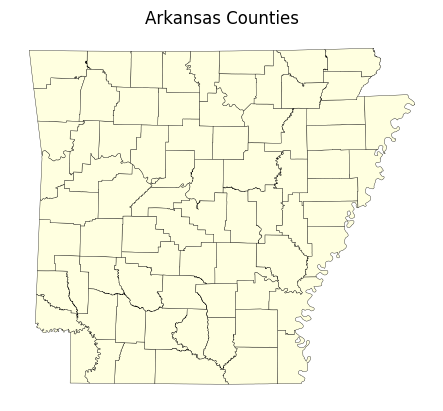

In [136]:
# NOTE: Code in this cell is complete. Make sure you understand the code before running the cell.

# Create a map showing the Arkansas counties by plotting ar_counties GeoDataFrame
figure, ax = plt.subplots(1,1)
ax.title.set_text("Arkansas Counties")
plt.axis("off")
ar_counties.plot(facecolor = "lightyellow", edgecolor = "black", linewidth = .25, ax=ax)

# Display the plot
plt.show()

The code above shows that the <b><i>ar_counties GeoDataFrame</i></b> contains the ability to store attributes that describe properties of each county such as <i>NAME</i> which is the name of the county and <i>GEOID</i> which is a unique identifier for the county. It also contains a special attribute <i>GEOMETRY</i> which is what allows GeoPandas to display the geometry or shape of each county on the figure above. Now that we've previewed the <b><i>ar_counties</i></b> GeoDataFrame let's take a look at the attribute we'll need to use to <b><i>join ar_counties</i></b> to the <b><i>ACS INCOME</i></b> data. 

<h4><u>Identifying Attributes of a GeoDataFrame</u></h4>
The attributes (column names) of <b><i>ar_counties</i></b> can be accessed using the <b>columns</b> attribute. <span class="bltn">Print</span> the <b>columns</b> in <b><i>ar_counties</i></b>. 

In [137]:
# Print the column names of the ar_counties GeoDataFrame
print(ar_counties.columns)

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data', 'geometry'],
      dtype='object')


The attribute in <b><i>ar_counties</i></b> that will allow the <b><i>ACS INCOME </i></b> data to be <b><i>joined</i></b> is <i>GEOID</i>. <span class="bltn">Print</span> the <span class="num">first 5 values</span> of the <i>GEOID</i> column. You will see that the values of <i>GEOID</i> consist of <span class="num">5 </span> numbers and that the data type is <b><i>object</i></b> which means it is stored as a <span class="str">string</span> in <b><i>ar_counties</i></b>. 

In [138]:
# Print the first 5 entries in the GEOID column of ar_counties
ar_counties["GEOID"].head()

0    05137
1    05113
2    05063
3    05085
4    05019
Name: GEOID, dtype: object

The <i>GEOID</i> column contains the unique ID to use to <b><i>join</i></b> the <b><i>ar_counties</i></b> GeoDataFrame to other ACS data, including the <b><i>income</i></b> data . The <span class="num">first two digits</span> of all entries in the <i>GEOID</i> column are <span class="num">05</span> which correspond to the state identifier for Arkansas. The <span class="num">last three digits</span> correspond to a unique identifier for the county. Remember though, that <i>GEOID</i> is stored as a <span class="str">string</span> at this point. 

<h4><u>Reading ACS Data into a DataFrame</u></h4>
The next step is to read in the <b><i>ACS Income</i></b> csv data into a pandas DataFrame called <b><i>acs_income</i></b>. 

In [139]:
# Read in the "X19_INCOME.csv" ACS table into pandas DataFrame 
acs_income = pd.read_csv("Data/X19_INCOME.csv")

<h4><u>Examining the acs_income DataFrame</u></h4>
Display the <span class="num">first 5 rows</span> of the <b><i>acs_income</i></b> DataFrame. 

In [140]:
# Look at the first 5 rows of data in acs_x19 DataFrame 
acs_income.head()

,OID_,GEOID,B19001e1,B19001m1,B19001e2,B19001m2,B19001e3,B19001m3,B19001e4,B19001m4,...,B19326e3,B19326m3,B19326e4,B19326m4,B19326e5,B19326m5,B19326e6,B19326m6,B19326e7,B19326m7
0,1,05000US01001,21397.0,325.0,1417.0,254.0,1172.0,249.0,1337.0,248.0,...,55680.0,4612.0,19022.0,2636.0,21633.0,1055.0,38193.0,3062.0,13282.0,1042.0
1,2,05000US01003,80930.0,1127.0,4068.0,491.0,3685.0,488.0,3386.0,565.0,...,53456.0,1351.0,21950.0,918.0,23430.0,890.0,38543.0,1177.0,15029.0,543.0
2,3,05000US01005,9345.0,313.0,1391.0,218.0,796.0,140.0,936.0,178.0,...,39310.0,2548.0,11274.0,1212.0,15520.0,1213.0,30169.0,4804.0,11381.0,542.0
3,4,05000US01007,6891.0,333.0,570.0,184.0,554.0,182.0,445.0,158.0,...,44220.0,5621.0,17365.0,2406.0,18535.0,1910.0,30538.0,5812.0,13987.0,1163.0
4,5,05000US01009,20847.0,394.0,1706.0,313.0,1145.0,227.0,921.0,214.0,...,45609.0,3597.0,19362.0,1112.0,21978.0,1031.0,39721.0,2815.0,13604.0,763.0


Many of the <b><i>ACS</i></b> files that are formatted to work with the <b><i>US Census Bureau's TIGER Shapefile</i></b> data have a similar format as the contents of <b><i>acs_income</i></b>. There is an "OID" which is a unique row identifer and "GEOID" which is used to join the table to the Shapefile. The attribute data is contained in the remaining columns. 

The values for the <i>GEOID</i> column in <b><i>acs_income</i></b> are slightly different than the values stored in the <i>GEOID</i> in <b><i>ar_counties</i></b>. The <i>GEOID</i> values in <b><i>acs_income</i></b> will need to be modified in order to <b><i>join</i></b> the two DataFrames. Before modifying, let's take a look at the shape of the two DataFrames. <span class="bltn">Print</span> the <b>shape</b> of <b><i>ar_counties</i></b> first, then <span class="bltn">print</span> the shape of <b><i>acs_income</i></b>. 

In [141]:
# Print the shape of the ar_counties GeoDataFrame. 
print(ar_counties.shape)

# # Print the shape of the acs_income DataFrame
print(acs_income.shape)

(75, 21)
(3220, 3046)


The result of <b><i>acs_income's</i></b> shape may look like an error has occured, but it is correct. <b><i>Acs_income</i></b> contains data for geographic areas designated as counties in the United States. This table also contains many attributes about household income including both <b><i>estimates and margins of error</i></b> for each estimate. This results in a DataFrame with a large column count. In the next step, let's modify the <b><i>acs_income</i></b> DataFrame to contain just the columns of interest for this Case Study.  

The 75 rows in <b><i>ar_counties</i></b> are the expected number of rows as there are 75 counties in Arkansas. We'll leave the <b><i>ar_counties</i></b> GeoDataFrame as is for now. 

The attribute of interest in <b><i>acs_income</i></b> is <i>B19001</i> which stands for <b><i>"Household income in the past 12 months in 2019 inflation-adjusted dollars"</i></b> (ACS_5yr_Seq_Table_Number_Lookup.xlxs, 2021). The columns representing this attribute contain either an <b><i>e</i></b> or <b><i>m</i></b> after <i>B19001</i> which stand for estimate or margin of error respectively (https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2020/TGRSHP2020_TechDoc.pdf, 2021). We'll work with the estimates, <i>B19001e</i> columns. Each column has a number after the <b<i>e</i></b> which represents the estimates for the number of households that fall in that particular category. B19001e1 is the total number of households, B19001e2 is the number of households that make less than < $10,000 and so on. Let's extract columns <i>B19001e1-e17</i>. 

<h4><u>Extracting Columns from acs_income DataFrame</u></h4>

First a <span class="bltn">list</span>, <b><i>extract_cols</i></b> is created to hold the column names of interest from the <b><i>acs_income</i></b> DataFrame. Two column names are specified at creation, <span class="str">OID_</span> and <span class="str">GEOID</span>. Panda's <b>filter</b> method is used to select all column names <b><i>like</i></b> <span class="str">B19001e</span> and the results stored in the variable <b><i>acs_sel</i></b>. <b><i>Acs_sel</i></b> is then added to the end of <b><i>extract_cols</i></b> using the <b>extend</b> method. At this point, <b><i>extract_cols</i></b> contains the names of all the columns to extract. A new View of the <b><i>acs_income</i></b> DataFrame is created called <b><i>house_inc</i></b> which contains all rows and the subset of columns specified by the <b><i>extract_cols</i></b> list from <b><i>acs_income</i></b>. From this point on, <b><i>house_inc</i></b> View will be used. 

In [142]:
# Create a list called extract_cols containing string values "OID_" and "GEOID"
extract_cols = ["OID_", "GEOID"]

# Extract all column names that match B19001e
acs_sel = acs_income.filter(like = "B19001e")

# Extend to the list of column names to extract 
extract_cols.extend(acs_sel.columns)

# Extract all rows and columns in extract_cols from acs_income as house_inc
house_inc = acs_income.loc[:,extract_cols]

# View the first 5 rows to make sure everything looks correct 
print(house_inc.head())

# Print the shape of house_inc 
print(house_inc.shape)

   OID_         GEOID  B19001e1  B19001e2  B19001e3  B19001e4  B19001e5  \
0     1  05000US01001   21397.0    1417.0    1172.0    1337.0     882.0   
1     2  05000US01003   80930.0    4068.0    3685.0    3386.0    3706.0   
2     3  05000US01005    9345.0    1391.0     796.0     936.0     705.0   
3     4  05000US01007    6891.0     570.0     554.0     445.0     452.0   
4     5  05000US01009   20847.0    1706.0    1145.0     921.0    1278.0   

   B19001e6  B19001e7  B19001e8  B19001e9  B19001e10  B19001e11  B19001e12  \
0     985.0     699.0    1050.0     995.0      676.0     1620.0     2197.0   
1    3884.0    4519.0    4084.0    3701.0     3460.0     7083.0     7845.0   
2     437.0     655.0     533.0     480.0      318.0      615.0      624.0   
3     339.0     271.0     243.0     442.0      336.0      519.0      581.0   
4    1099.0    1501.0     887.0    1108.0      926.0     1800.0     2250.0   

   B19001e13  B19001e14  B19001e15  B19001e16  B19001e17  
0     2931.0     2313

<h4><u>Modifying houses_inc's GEOID</u></h4>

Now that the columns of interest, total household income, have been extracted into <b><i>house_inc</i></b> let's look at using different types of <b><i>joins</i></b> with <b><i>house_inc</i></b> and <b><i>ar_counties</i></b> DataFrames. First, the <i>GEOID</i> column in <b><i>house_inc</i></b> must be modified to match the <i>GEOID</i> column in <b><i>ar_counties</i></b>. 

A <span class="bltn">lambda</span> function is created that <b>replaces</b> the extra characters, <span class="str">05000US</span> in the values stored in <b><i>house_inc's</i></b> <i>GEOID</i> column with <span class="str">""</span>. This results in those extra characters being removed from the values in <b><i>house_inc's</i></b> <i>GEOID</i> column. The <span class="bltn">lambda</span> function is then applied over each row in the <i>GEOID</i> column by using the <b>map</b> method. 

To see the changes of the values in <b><i>house_inc's</i></b> <i>GEOID</i> column, <span class="bltn">print</span> the <span class="num">first 5 and last 5 rows</span>. 

In [143]:
# Map the replace function to each entry in "GEOID"
house_inc["GEOID"] = house_inc["GEOID"].map(lambda x: x.replace("05000US", ""))

# Print first 5 rows of GEOID column
print(house_inc["GEOID"].head())

# Print the last 5 rows of GEOID column
print(house_inc["GEOID"].tail())

0    01001
1    01003
2    01005
3    01007
4    01009
Name: GEOID, dtype: object
3215    72145
3216    72147
3217    72149
3218    72151
3219    72153
Name: GEOID, dtype: object


<h3>Merging, Concatenating, and Joins - Tabular Example</h3>
In the Code cells below you will see examples of different <b><i>joins</i></b> using the <b><i>tabular data</i></b> stored in the <b<i>ar_counties</i></b> and <b><i>house_inc</i></b> DataFrame objects created above. Pay particular attention to the resulting shapes from the different joins. 

<h4><u>Inner Join</u></h4>

Let's look at an <b><i>inner join</i></b> between <b><i>ar_counties</i></b> and <b><i>house_inc</i></b>. As a reminder, the <b><i>ar_counties</i></b> GeoDataFrame has a shape of (75, 21) and the <b><i>house_inc</i></b> DataFrame has a shape of (3220, 19). The <b><i>inner join</i></b> will be performed using the <b>merge</b> function and specifying <b><i>how</i></b> <span class="op">=</span> <span class="str">"inner"</span> and joining <b><i>on</i></b> <i>GEOID</i>. 

In [144]:
# Inner join 
ar_inc_inner = pd.merge(ar_counties, house_inc, how = "inner", on = "GEOID")

# Print the resulting shape 
print(ar_inc_inner.shape)

# Print ar_inc_inner's column names
print(ar_inc_inner.columns)

(75, 39)
Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data', 'geometry', 'OID_', 'B19001e1', 'B19001e2', 'B19001e3',
       'B19001e4', 'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8', 'B19001e9',
       'B19001e10', 'B19001e11', 'B19001e12', 'B19001e13', 'B19001e14',
       'B19001e15', 'B19001e16', 'B19001e17'],
      dtype='object')


The <b><i>inner join</i></b> was able to match each row of the <b><i>ar_counties</i></b> GeoDataFrame to the row with the matching <i>GEOID</i> in <b><i>house_inc</i></b> resulting in <span class = "num">75 rows</span>. The <span class="num">39 columns</span> comes from <b><i>ar_counties</i></b> <span class="num">21 columns</span>, <b><i>house_inc</i></b> <span class="num">19</span> columns, and the shared <i>GEOID</i> column which only is included once. 

<h4><u>Left Outer Join</u></h4>

Next let's try a <b><i>left outer join</i></b> using the <b>merge</b> function, specifying <b><i>how</i></b> <span class="op"> =</span> <span class="str">"left"</span> and joining <b><i>on</i></b> the <i>GEOID</i> column. 

In [145]:
arc_inc_ljoin = pd.merge(ar_counties, house_inc, how = "left", on = "GEOID")

# Print the resulting shape
print(arc_inc_ljoin.shape)

# Print the resulting columns  
print(arc_inc_ljoin.columns)

(75, 39)
Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data', 'geometry', 'OID_', 'B19001e1', 'B19001e2', 'B19001e3',
       'B19001e4', 'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8', 'B19001e9',
       'B19001e10', 'B19001e11', 'B19001e12', 'B19001e13', 'B19001e14',
       'B19001e15', 'B19001e16', 'B19001e17'],
      dtype='object')


This <b><i>left outer join</i></b> returns all rows in <b><i>ar_counties</i></b> and includes matching values in the <b><i>house_inc</i></b> columns in which the <i>GEOID</i> value are equal. In this example, the <b><i>left outer join</i></b> and the <b><i>inner join</i></b> returns the same results because every <b><i>ar_counties</i></b> <i>GEOID</i> has a <b><i>one-to-one</i></b> relationship in <b><i>house_inc</i></b>. 

Let's double check that the <b><i>left outer join</i></b> and <b><i>inner join</i></b> results are equal by using <b><i>arc_inc_ljoin</i></b> <b>equals</b> method and passing <b><i>ar_inc_inner</i></b> as the argument. The result should return <span class="bltn">True</span>. 

In [146]:
# Check that the arc_inc_ljoin and ar_inc_inner views are equal using arc_inc_ljoin.equals() 
# and passing ar_inc_inner as the argument. 
# The result should be True since ar_counties GEOID has a one-to-one relationship with house_inc GEOID. 
print(arc_inc_ljoin.equals(ar_inc_inner))

True


<h4><u>Right Outer Join </u></h4>

In this <b><i>right outer join</i></b> between <b><i>ar_counties</i></b> and <b><i>house_inc</i></b> <b><i>how</i></b> is specified as <span class="str">right</span> and the two DataFrames are again joined <b><i>on</i></b> <i>GEOID</i>. 

In [147]:
# Perform a right outer join using merge. Hint: change how = "left" but leave the rest the same
arc_inc_rjoin = pd.merge(ar_counties, house_inc, how = "right", on = "GEOID")

# Print the resulting shape 
print(arc_inc_rjoin.shape)

# Print the first 5 rows of arc_inc_rjoin
arc_inc_rjoin.head()

(3220, 39)


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,B19001e8,B19001e9,B19001e10,B19001e11,B19001e12,B19001e13,B19001e14,B19001e15,B19001e16,B19001e17
0,NaN,NaN,NaN,01001,NaN,NaN,NaN,NaN,NaN,NaN,...,1050.0,995.0,676.0,1620.0,2197.0,2931.0,2313.0,1279.0,1164.0,680.0
1,NaN,NaN,NaN,01003,NaN,NaN,NaN,NaN,NaN,NaN,...,4084.0,3701.0,3460.0,7083.0,7845.0,10374.0,6875.0,4815.0,4820.0,4625.0
2,NaN,NaN,NaN,01005,NaN,NaN,NaN,NaN,NaN,NaN,...,533.0,480.0,318.0,615.0,624.0,769.0,501.0,243.0,189.0,153.0
3,NaN,NaN,NaN,01007,NaN,NaN,NaN,NaN,NaN,NaN,...,243.0,442.0,336.0,519.0,581.0,1119.0,538.0,182.0,146.0,154.0
4,NaN,NaN,NaN,01009,NaN,NaN,NaN,NaN,NaN,NaN,...,887.0,1108.0,926.0,1800.0,2250.0,2497.0,1390.0,894.0,926.0,519.0


Looking at the <span class="num">first 5 rows</span>, the <b><i>right outer join</i></b> keeps all the rows in the <b><i>house_inc</i></b> DataFrame. If a matching <i>GEOID</i> is not found in <b><i>ar_counties</i></b> then <b><i>NaN</i></b> is used for the values in <b><i>ar_counties</i></b> columns. Because we have a <b><i>one-to-one relationship</i></b> between <i>GEOID</i>, we'll work with the <b><i>inner join</i></b> of the two DataFrames and store the result in a variable called <b><i>ar_counties_inc</i></b>. 

In [148]:
# Inner Join. We'll work with ar_counties_inc only from now on. 
ar_counties_inc = pd.merge(ar_counties, house_inc, how = "inner", on = "GEOID")

We've seen an example of the different <b><i>joins</i></b> in a tabular (DataFrame) form above, but let's look at them another way, geospatially as part of a map. This can help us visualize the different joins. We'll work with several Views of <b><i>ar_counties</i></b> to illustrate this. 

<h3>Merging, Concatenating, and Joins - Geospatial Mapping Example</h3>

Above we saw the results of <b><i>joins</i></b> using tabular data. In the Code cells below, we'll see examples of <b><i>merging, joins, and concatenating GeoDataFrames</i></b> by plotting the resulting <b><i>geometeries</i></b>. This allows us to display the results visually as maps. 

<h4><u>Subsetting ar_counties DataFrame</u></h4>

In this example, the <b><i>ar_counties</i></b> GeoDataFrame is subset into smaller Views. These subsets will then be joined back together in different ways to illustrate different join types visually. First <b><i>ar_counties_0_9</i></b> is created which contains the <span class="num">first 10 rows</span> of <b><i>ar_counties</i></b>. <span class="bltn">Print</span> the <b>shape</b> to confirm this. 

In [149]:
# Create a variable ar_counties_0_9 that contains the first 10 rows of the ar_counties GeoDataFrame
ar_counties_0_9 = ar_counties.iloc[0:10, :]

# Print the shape of ar_counties_0_9
print(ar_counties_0_9.shape)

(10, 21)


<b><i>Ar_counties_10_74</i></b> consists of the remaining rows in <b><i>ar_counties</i></b>. This means that there are no duplicate rows in either subset. To confirm that <b><i>ar_counties_10_74</i></b> consists of the remaining rows, <span class="bltn">print</span> the <b>shape</b>. 

In [150]:
# Create a variable ar_counties_10_74 that contains the rest of the rows in ar_counties
ar_counties_10_74 = ar_counties.iloc[10:, :]

# Print the shape of ar_counties_10_74
print(ar_counties_10_74.shape)

(65, 21)


<h4><u>Mapping ar_counties Subsets</u></h4>

Before performing any <b><i>joins</i></b> let's first map the original <b><i>ar_counties</i></b> and the newly created <b><i>ar_counties_0_9</i></b> and <b><i>ar_counties_10_74</i></b>. You don't have to understand the details of the code in the Code cell below, just know that the code creates <span class="num">3</span> subplots next to each other, that display the <b><i>geometry</i></b> of <b><i>ar_counties, ar_counties_0_9, and ar_counties_10_74</i></b>. 

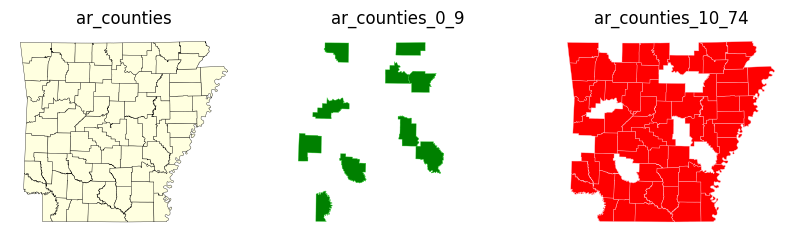

In [151]:
# NOTE: Code in this cell is complete. 

# Specify the number of subplots in the figure and the figure size
figure, axs = plt.subplots(1,3, figsize = (10,10))

# Plot the original ar_counties variable in the far left subplot
ar_counties.plot(facecolor = "lightyellow", edgecolor = "black", linewidth = .25, ax=axs[0])
axs[0].axis("off")
axs[0].title.set_text("ar_counties")

# Plot the ar_counties_0_9 variable in the middle subplot
# Line below is a workaround to make all subplots have the same aspect. 
# Forces ar_counties_0_9 to the same dimensions as the other subplots. 
ar_counties.plot(facecolor = "white", edgecolor = "white", linewidth = .25, ax=axs[1])
ar_counties_0_9.plot(facecolor = "green", edgecolor = "limegreen", linewidth = .25, ax=axs[1])
axs[1].axis("off")
axs[1].title.set_text("ar_counties_0_9")

# Plot the ar_counties_10_74 variable in rightmost subplot
ar_counties_10_74.plot(facecolor = "red", edgecolor = "pink", linewidth = .25, ax=axs[2])
axs[2].axis("off")
axs[2].title.set_text("ar_counties_10_74")

# Display the plot
plt.show()

<h4><u>Concatenation Example</u></h4>

<b><i>Ar_counties_concat</i></b> is the result of concatenating the rows of <b><i>ar_counties_0_9</i></b> and <b><i>ar_counties_10_74</i></b> using pandas <b>concat</b> function. <span class="bltn">Print</span> the resulting <b>shape</b> of <b><i>ar_counties_concat</i></b>. 

In [152]:
# Concatenate the rows of ar_counties_0_9 and ar_counties_10_74
ar_counties_concat = pd.concat([ar_counties_0_9, ar_counties_10_74], axis = 0)

# Print the resulting shape
print(ar_counties_concat.shape)

(75, 21)


The shape of <b><i>ar_counties_concat</i></b> is the same as the original <b><i>ar_counties</i></b>. Let's create <span class="num">3</span> subplots to display <b><i>ar_counties_0_9, ar_counties_10_74, and ar_counties_concat</i></b>. 

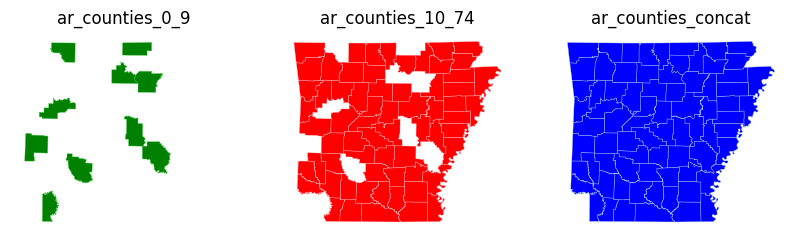

In [153]:
# NOTE: Code in this cell is complete. 

# Display the results of concatenating by plotting the geometries of the two GeoDataFrames
# Plot the counties
figure, axs = plt.subplots(1,3, figsize = (10,10))

# Plot the ar_counties_0_9 variable 
ar_counties.plot(facecolor = "white", edgecolor = "white", linewidth = .25, ax=axs[0])
ar_counties_0_9.plot(facecolor = "green", edgecolor = "limegreen", linewidth = .25, ax=axs[0])
axs[0].axis("off")
axs[0].title.set_text("ar_counties_0_9")

# Plot the ar_counties_10_74 variable
ar_counties_10_74.plot(facecolor = "red", edgecolor = "pink", linewidth = .25, ax=axs[1])
axs[1].axis("off")
axs[1].title.set_text("ar_counties_10_74")

# Plot the ar_counties_concat variable
ar_counties_concat.plot(facecolor = "blue", edgecolor = "lightblue", linewidth = .25, ax=axs[2])
axs[2].axis("off")
axs[2].title.set_text("ar_counties_concat")


<h4><u>Inner Join Example</u></h4>

Next let's look at an inner join between the smaller of the subsets, <b><i>ar_counties_0_9</i></b> and the original <b><i>ar_counties</i></b>. <i>GEOID</i> will be specified as the attribute to join <b><i>on</i></b> and <span class="str">"inner"</span> specified for <b><i>how</i></b> to join the DataFrames. The <b><i>suffixes</i></b> parameter is also set by passing in the tuple of <span class="str">"_09" </span> and <span calss="str">"_orig"</span> to append to the end of the joined column names to specify which DataFrame they correspond to. 

<span class="bltn">Print</span> the <b>shape</b> of the newly created inner join, <b><i>ar_counties_0_9_inner</i></b>. Also <span class="bltn">print</span> the <b>columns</b> of <b><i>ar_counties_0_9_inner</i></b>. 

In [154]:
# Inner join of ar_counties_0_9 and ar_counties
ar_counties_0_9_inner = pd.merge(ar_counties_0_9, ar_counties, how = "inner", on = "GEOID", suffixes = ("_09", "_orig"))

# Specify the column to use for GeoDataFrame geometry
ar_counties_0_9_inner.set_geometry(ar_counties_0_9_inner["geometry_09"], inplace = True)

# Print the shape of the result of inner join. The resulting inner join contains the rows from ar_counties_0_9 and the columns 
# from both GeoDataFrames. An additional geometry column is added resulting in 42 columns. 
print(ar_counties_0_9_inner.shape)

print(ar_counties_0_9_inner.columns)

(10, 41)
Index(['STATEFP_09', 'COUNTYFP_09', 'COUNTYNS_09', 'GEOID', 'NAME_09',
       'NAMELSAD_09', 'LSAD_09', 'CLASSFP_09', 'MTFCC_09', 'CSAFP_09',
       'CBSAFP_09', 'METDIVFP_09', 'FUNCSTAT_09', 'ALAND_09', 'AWATER_09',
       'INTPTLAT_09', 'INTPTLON_09', 'Shape_Leng_09', 'Shape_Area_09',
       'GEOID_Data_09', 'geometry_09', 'STATEFP_orig', 'COUNTYFP_orig',
       'COUNTYNS_orig', 'NAME_orig', 'NAMELSAD_orig', 'LSAD_orig',
       'CLASSFP_orig', 'MTFCC_orig', 'CSAFP_orig', 'CBSAFP_orig',
       'METDIVFP_orig', 'FUNCSTAT_orig', 'ALAND_orig', 'AWATER_orig',
       'INTPTLAT_orig', 'INTPTLON_orig', 'Shape_Leng_orig', 'Shape_Area_orig',
       'GEOID_Data_orig', 'geometry_orig'],
      dtype='object')


Next lets visualize <b><i>ar_counties_0_9_inner</i></b> as a map. The leftmost subplot displays a map of <b><i>ar_counties_0_9</i></b>, the middle subplot of <b><i>ar_counties</i></b>, and the right subplot of the <b><i>inner join</i></b> between the two. 

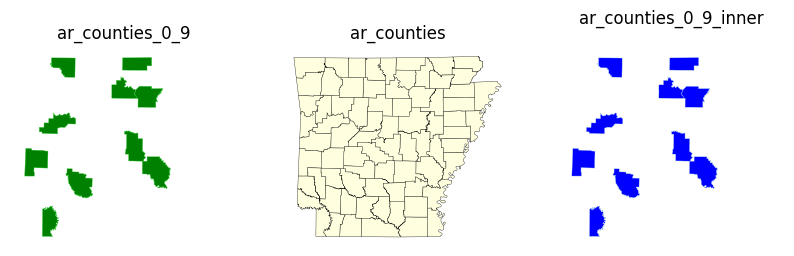

In [155]:
# NOTE: Code in this cell is complete. 

# Display the results of inner join by plotting the geometries of the two GeoDataFrames
# Create the subplots 
figure, axs = plt.subplots(1,3, figsize = (10,10))

# Plot the ar_counties_0_9 variable. Force aspect again with ar_counties
ar_counties.plot(facecolor = "white", edgecolor = "white", linewidth = .25, ax=axs[0])
ar_counties_0_9.plot(facecolor = "green", edgecolor = "limegreen", linewidth = .25, ax=axs[0])
axs[0].axis("off")
axs[0].title.set_text("ar_counties_0_9")

# Plot the original ar_counties variable
ar_counties.plot(facecolor = "lightyellow", edgecolor = "black", linewidth = .25, ax=axs[1])
axs[1].axis("off")
axs[1].title.set_text("ar_counties")

# Plot the ar_counties_concat variable. Force aspect again with ar_counties 
ar_counties.plot(facecolor = "white", edgecolor = "white", linewidth = .25, ax=axs[2])
ar_counties_0_9_inner.plot(facecolor = "blue", edgecolor = "lightblue", linewidth = .25, ax=axs[2])
axs[2].axis("off")
axs[2].title.set_text("ar_counties_0_9_inner")

The maps above show that the result of the <b><i>inner join</i></b> between <b><i>ar_counties_0_9</i></b> and <b><i>ar_counties</i></b> is simply the <b><i>ar_counties_0_9</i></b> DataFrame's rows.

<h4><u>Right Outer Join</u></h4>
The final join visualized with maps is a <b><i>right outer join</i></b>. Since this is a <b><i>right outer join</i></b> all of the rows from <b><i>ar_counties</i></b> will be kept along with the columns from both <b><i>ar_counties_0_9</i></b> and <b><i>ar_counties</i></b> resulting in <span class="num">42</span> columns. 

In [156]:
# Right outer join 
ar_counties_0_9_right = pd.merge(ar_counties_0_9, ar_counties, how = "right", on = "GEOID", suffixes = ("_09", "_orig"))

# Specify the column to use for GeoDataFrame geometry
ar_counties_0_9_right.set_geometry(ar_counties_0_9_right["geometry_orig"], inplace = True)

# Print the resulting shape. 75 rows because all rows from the ar_counties GeoDataFrame are included in the right join. 
print(ar_counties_0_9_right.shape)


(75, 41)


Now that the <b><i>right outer join</i></b> is complete, let's map it. The left subplot shows the <b><i>ar_counties_0_9</i></b> map, the middle subplot the <b><i>ar_counties</i></b>, and the right the results of the right outer join <b><i>ar_counties_0_9_right</i></b>. 

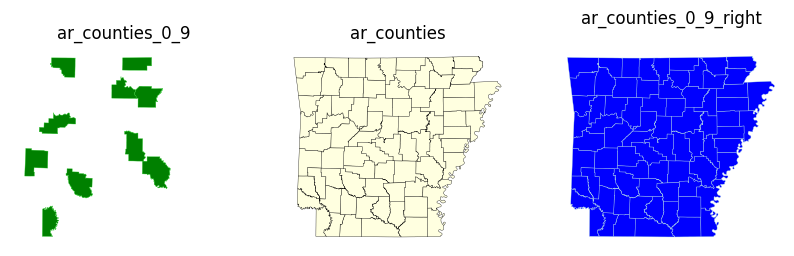

In [157]:
# NOTE: Code in this cell is complete. 

# Display the results of right outer join by plotting the geometries of the two GeoDataFrames and the join
figure, axs = plt.subplots(1,3, figsize = (10,10))

# Plot the ar_counties_0_9 variable. 
ar_counties.plot(facecolor = "white", edgecolor = "white", linewidth = .25, ax=axs[0])
ar_counties_0_9.plot(facecolor = "green", edgecolor = "limegreen", linewidth = .25, ax=axs[0])
axs[0].axis("off")
axs[0].title.set_text("ar_counties_0_9")

# Plot the original ar_counties variable. 
ar_counties.plot(facecolor = "lightyellow", edgecolor = "black", linewidth = .25, ax=axs[1])
axs[1].axis("off")
axs[1].title.set_text("ar_counties")

# Plot the ar_counties_concat variable
ar_counties.plot(facecolor = "white", edgecolor = "white", linewidth = .25, ax=axs[2])
ar_counties_0_9_right.plot(facecolor = "blue", edgecolor = "lightblue", linewidth = .25, ax=axs[2])
axs[2].axis("off")
axs[2].title.set_text("ar_counties_0_9_right")

<h3>Use Case: Total Households</h3>
Previously you created a variable <b><i>ar_counties_inc</i></b> which contained the <b><i>inner join</i></b> results of the <b><i>ar_counties</i></b> GeoDataFrame to the <b><i>house_inc</i></b> DataFrame. Let's use the data stored in <b><i>ar_counties_inc</i></b> to take a look at the total households in each county. Let's take another look at the <span class="num">first 5 rows</span> of <b><i>ar_counties_inc</i></b> to become more familiar with its format. 

In [158]:
# Take another look at the first five rows of ar_counties_inc
ar_counties_inc.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,B19001e8,B19001e9,B19001e10,B19001e11,B19001e12,B19001e13,B19001e14,B19001e15,B19001e16,B19001e17
0,05,137,00069902,05137,Stone,Stone County,06,H1,G4020,None,...,274.0,367.0,192.0,373.0,431.0,409.0,345.0,15.0,93.0,54.0
1,05,113,00069175,05113,Polk,Polk County,06,H1,G4020,None,...,672.0,572.0,350.0,695.0,714.0,610.0,360.0,196.0,136.0,243.0
2,05,063,00069163,05063,Independence,Independence County,06,H1,G4020,None,...,692.0,735.0,610.0,1237.0,1652.0,1733.0,669.0,440.0,388.0,317.0
3,05,085,00069164,05085,Lonoke,Lonoke County,06,H1,G4020,340,...,1458.0,1024.0,1142.0,2257.0,3043.0,3954.0,2389.0,1498.0,1519.0,880.0
4,05,019,00066845,05019,Clark,Clark County,06,H1,G4020,None,...,428.0,336.0,325.0,653.0,738.0,1136.0,538.0,308.0,196.0,98.0


<h4><u>Total Number of Households Plot</u></h4>

First let's plot the Arkansas counties (<b><i>ar_counties_inc</i></b>) by the total number of households, <i>B19001e1</i>. A stem plot will be used to help more easily see which county FIPS code (<i>COUNTYFP</i>) each data point is for. 

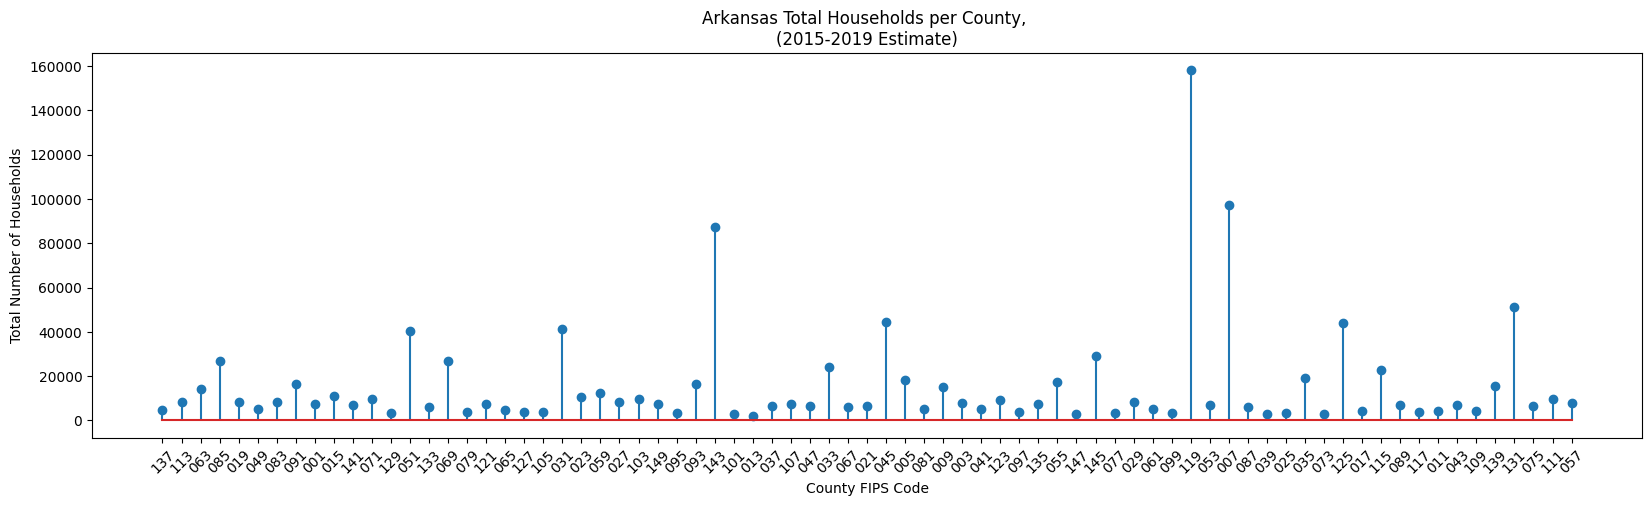

In [159]:
# NOTE: Code in this cell is complete. Stem plot of total population 

# Set up the figure and the number of subplots 
figure, ax = plt.subplots(1,1, figsize = (20,5))

# Title and labels
plt.title("Arkansas Total Households per County, \n(2015-2019 Estimate)")
plt.xlabel("County FIPS Code")
plt.xticks(rotation = 45)
plt.ylabel("Total Number of Households")

# Create Stem plot with the COUNTYFP code on the x-axis and total number of households on y-axis
plt.stem(ar_counties_inc["COUNTYFP"], ar_counties_inc["B19001e1"])

# Show plot
plt.show()

By looking at the stem plot, we can see that the majority of counties in Arkansas have a low number of households. Counties <b><i>119, 143, and 007</i></b> appear to have the highest number of households. Let's find out what the <b><i>names</i></b> of these counties are and look at <b><i>descriptive statistics</i></b> about the Total households. 

<h4><u>Descriptive Statistics for Total Counties</u></h4>
In the Code cells below, the total number of households <i>B19001e1</i> is sorted in decending order using the <b>sort_values</b> method and the <i>COUNTYFP, GEOID, NAME, and B19001e1</i> columns are displayed. This shows us that <span class="str">Pulaski, Benton, and Washington</span> counties are the names of the counties that correspond to the <i>COUNTYFP</i> codes from the stem plot above. 


In [160]:
# Sort the values of "B19001e1" descending. 
ar_counties_inc[["COUNTYFP", "GEOID", "NAME", "B19001e1"]].sort_values("B19001e1", ascending = False)

,COUNTYFP,GEOID,NAME,B19001e1
54,119,05119,Pulaski,158051.0
56,007,05007,Benton,97249.0
29,143,05143,Washington,87325.0
71,131,05131,Sebastian,51228.0
38,045,05045,Faulkner,44575.0
...,...,...,...,...
58,039,05039,Dallas,2969.0
30,101,05101,Newton,2936.0
48,147,05147,Woodruff,2932.0
61,073,05073,Lafayette,2784.0


Now let's calculate the minimum (min), the maximum (max), the median, the mean, the variance (var), and the standard deviation (std) of the total households per county using the <b>agg</b> method and passing in a <span class="bltn">dictionary</span> with <i>B19001e1</i> as the <b><i>key</i></b> and a <span class="bltn">list</span> containing the descriptive statistics to apply . 

In [161]:
# Print descriptive statistics about the Total households "B19001e1"
ar_counties_inc.agg({"B19001e1":["min", "max", "median", "mean", "var", "std"]})

,B19001e1
min,1.850000e+03
max,1.580510e+05
median,7.485000e+03
mean,1.544095e+04
var,5.678261e+08
std,2.382910e+04


From the plots and descriptive statistics above, we can see that the smallest number of households is <span class="num">1,850</span> and the largest is <span class="num">158,051</span>. The average number of households is <span class="num">15,440.95</span> or approximately <span class="num">15,441</span> households. 

<h4><u>Histogram of the Total Households</u></h4>

Next let's create a <b><i>histogram</i></b> displaying the Total Number of Households per county (<i>B19001e1</i>) using <span class="num">5 bins</span>. 

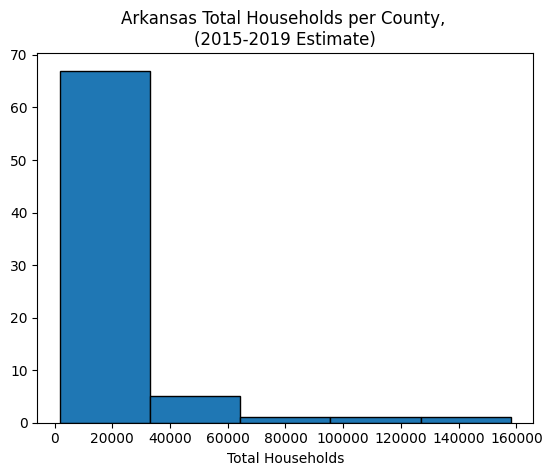

In [162]:
# Histogram
plt.title("Arkansas Total Households per County, \n(2015-2019 Estimate)")
plt.xlabel("Total Households")
plt.hist(ar_counties_inc["B19001e1"], edgecolor = "black", bins = 5)
plt.show()

This histogram shows that the the distribution is <b><i>positively skewed</i></b>. Most counties have a total number of households in the smaller range, while a few counties have a total number of households that are much larger in total. This is similar to what was shown in the stem plot above.

An additional way that this type of data can be displayed is as a <b><i>choropleth map</i></b>. Let's create a <b><i>choropleth map</i></b> displaying the "Total Households" variable for each county. 

<h4><u>Choropleth Map of Total Households per County</u></h4>

A <b><i>choropleth map</i></b> is created in the Code cell below that displays the Total Population <i>B19001e1</i> for each county in Arkansas. A total of <span class="num">5 classes</span> are created for <i>B19001e1</i> using a <b><i>natural breaks</i></b> classification scheme. 

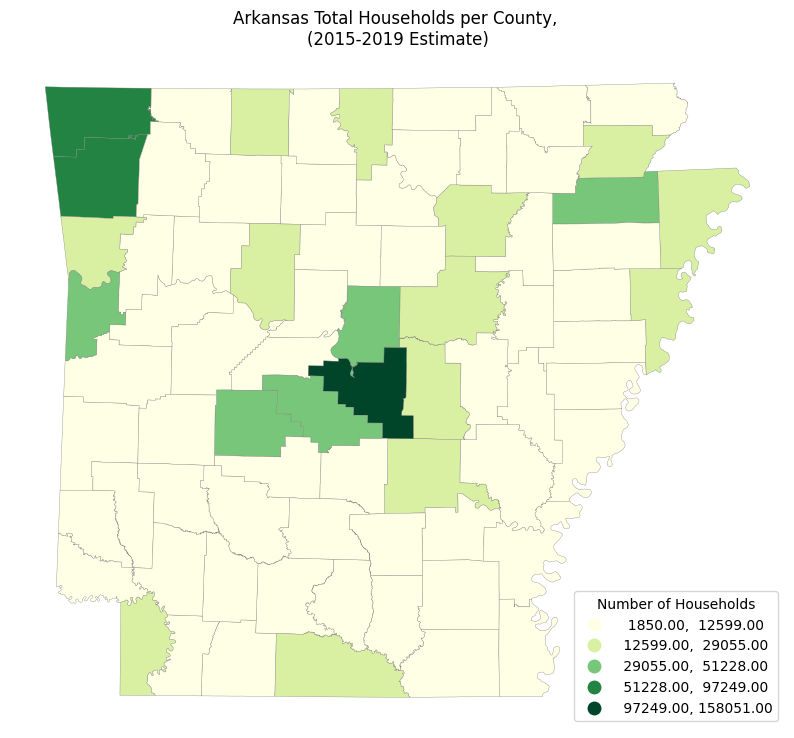

In [163]:
# Create a choropleth map of the total households per county 
figure, ax = plt.subplots(1,1,figsize = (10,10))
ax.title.set_text("Arkansas Total Households per County, \n(2015-2019 Estimate)")
plt.axis("off")
ar_counties_inc.plot(column = "B19001e1", edgecolor = "grey", linewidth = .25, ax=ax, cmap = "YlGn", scheme = "naturalbreaks",
                         k = 5, legend = True, legend_kwds={"loc":"lower right", "title":"Number of Households"})

# Display the plot
plt.show()

The map above shows us the same data that we look at previously, however it is now in the context of the <b><i>geographical area</i></b> represented which is the county. From the map we can see that the majority of counties have a low number of households. Only three counties, one in Central Arkansas (Pulaski), and two in NorthWest Arkansas (Washington and Benton) have a total number of households <span class="num">greater than or equal to 51,228</span>. 

<h3>Use Case - Income </h3>
In addition to the Total Household (<i>B19001e1</i>) attribute in <b><i>ar_counties_inc</i></b> to take a look at various <b><i>income levels</i></b> for households per county in Arkansas and display them on a map. For this use case, let's visualize the<b><i> number of households making less than</i></b> <span class="num">$20,000 per year</span> and <b><i>normalize the results by the total number of households</i></b> using the following attributes:

<ol>
    <li><i>B19001e1</i> - Total number of households</li>
    <li><i>B19001e2</i> - Income less than 10,000</li>
    <li><i>B19001e3</i> - Income between 10,000 - 14,999</li>
    <li><i>B19001e4</i> - Income between 15,000 - 19,999</li>
</ol>


<h4><u>Extracting the Income Attributes</u></h4>

<b><i>Ar_less_20</i></b> is created to contain only the columns in the Code cell above that areneeded from <b><i>ar_counties_inc</i></b> for this use case. 

In [164]:
# Create a GeoDataFrame view extracting the four attributes listed above along with attributes needed for the counties. 

# List containing the strings "GEOID", "NAME", and the "geometry" that represent the attributes needed in ar_counties_inc
sel_cols = ["GEOID", "NAME", "geometry"]

# Extending the list to include the four income related variables
sel_cols.extend(["B19001e" + str(x) for x in range(1, 5)])

# Create a DataFrame view of the data needed. 
ar_less_20 = ar_counties_inc.loc[:, sel_cols]

# Check the top 5 rows by displaying them 
ar_less_20.head()

,GEOID,NAME,geometry,B19001e1,B19001e2,B19001e3,B19001e4
0,05137,Stone,"POLYGON ((552791.736 3968679.438, 552801.997 3...",4787.0,445.0,522.0,467.0
1,05113,Polk,"POLYGON ((366604.184 3838500.316, 366612.224 3...",8243.0,686.0,740.0,734.0
2,05063,Independence,"POLYGON ((605235.166 3956717.914, 605130.754 3...",14322.0,849.0,918.0,1110.0
3,05085,Lonoke,"POLYGON ((584519.936 3856034.703, 584527.711 3...",26895.0,1605.0,1266.0,1159.0
4,05019,Clark,"POLYGON ((453738.656 3786012.704, 453738.676 3...",8446.0,905.0,421.0,529.0


<h4><u>Creating User Defined Columns</u></h4>
Next let's create a column <i>inc_less_20</i> that contains the <b>sum</b> of the counts of households in the three income levels: <i>B19001e2 - e4</i>. <span class="bltn">Print</span> the <span class="num">first 3 rows</span> to make sure the new column looks like expected. 

In [165]:
# Create a new column "inc_less_20" that contains the counts of households making less than $20,000
ar_less_20["inc_less_20"] = ar_less_20.loc[:,["B19001e2","B19001e3", "B19001e4"]].sum(axis=1)

# View the first 3 rows
ar_less_20.head(3)

,GEOID,NAME,geometry,B19001e1,B19001e2,B19001e3,B19001e4,inc_less_20
0,05137,Stone,"POLYGON ((552791.736 3968679.438, 552801.997 3...",4787.0,445.0,522.0,467.0,1434.0
1,05113,Polk,"POLYGON ((366604.184 3838500.316, 366612.224 3...",8243.0,686.0,740.0,734.0,2160.0
2,05063,Independence,"POLYGON ((605235.166 3956717.914, 605130.754 3...",14322.0,849.0,918.0,1110.0,2877.0


Next, a column will need to be created that holds the results of the <i>inc_less_20</i> attribute <b><i>normalized</i></b> by the <i>Total Population</i> for each county, multiplied by <span class="num">100</span> to create a percentage. This will be stored as the <i>inc_20_norm</i> attribute. <span class="bltn">Print</span> the <span class="num">first 3 rows</span> to check that the new column looks correct. 

In [166]:
# Create a new column "perc_less_20" that contains the result of (inc_less_20/b19001e1) * 100
ar_less_20["inc_20_norm"] = (ar_less_20["inc_less_20"] / ar_less_20["B19001e1"]) * 100

# View the results by showing the first 3 rows
ar_less_20.head(3)

,GEOID,NAME,geometry,B19001e1,B19001e2,B19001e3,B19001e4,inc_less_20,inc_20_norm
0,05137,Stone,"POLYGON ((552791.736 3968679.438, 552801.997 3...",4787.0,445.0,522.0,467.0,1434.0,29.956131
1,05113,Polk,"POLYGON ((366604.184 3838500.316, 366612.224 3...",8243.0,686.0,740.0,734.0,2160.0,26.204052
2,05063,Independence,"POLYGON ((605235.166 3956717.914, 605130.754 3...",14322.0,849.0,918.0,1110.0,2877.0,20.087977


<h4><u>Choropleth Map of Total Households per County</u></h4>

A <b><i>choropleth map</i></b> is created in the Code cell below that displays the number of households that have an income <span class="num">less than $20,000</span> (<i>inc_20_norm</i>) normalized by the <i>Total Population</i> for each county in Arkansas. A total of <span class="num">5 classes</span> are created for <i>inc_20_norm</i> using a <b><i>natural breaks</i></b> classification scheme. 

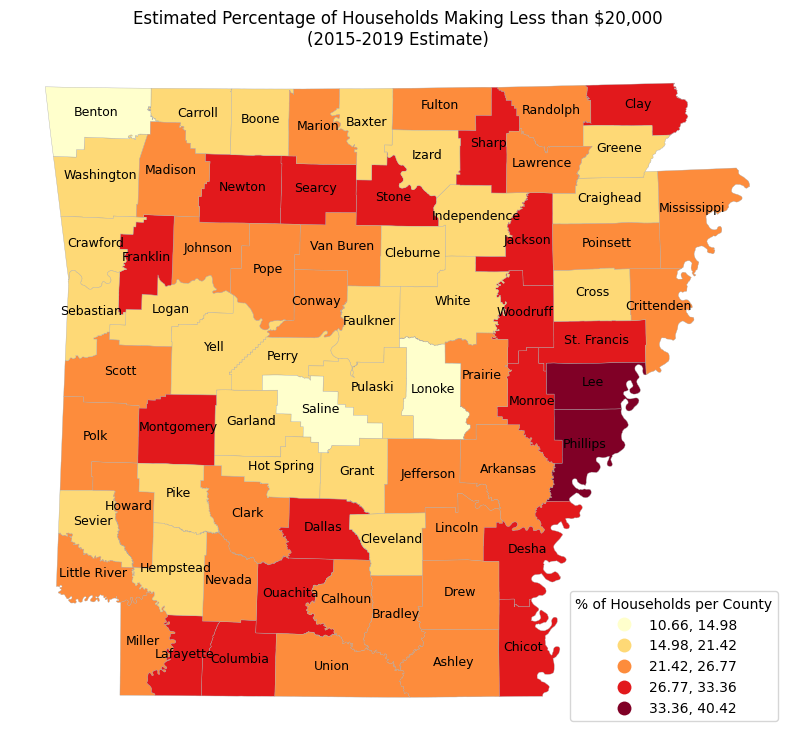

In [167]:
# NOTE: Code in this cell is complete. 

# Create a choropleth map displaying the percentage of households making less than 20,000 
figure, ax = plt.subplots(1,1,figsize = (10,10))
ax.title.set_text("Estimated Percentage of Households Making Less than $20,000\n(2015-2019 Estimate)")
plt.axis("off")
ar_less_20.plot(column = "inc_20_norm", edgecolor = "darkgrey", linewidth = .25, ax=ax, cmap = "YlOrRd", scheme = "naturalbreaks",
                         k = 5, legend = True, legend_kwds={"loc":"lower right", "title":"% of Households per County"})

# Line of code below based on tozCSS solution https://stackoverflow.com/questions/38899190/geopandas-label-polygons
ar_less_20.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize = 9),axis=1);

# Display the plot
plt.show()

The map above shows <span class="str">Lee and Phillips</span> counties have the highest percentage of households making less than <span class="num">$20,000</span> when normalized by the total population of the county for the <span class="num">2015-2019</span> estimates. <span class="str">Benton, Saline, and Lonoke</span> counties have the lowest percentage of households that meet this criteria. 

<h3 class="yt">Your Turn: 1</h3>
The attribute <i>B19001e17</i> contains the count of households that are estimated to have an <span class="num">income greater than \$200,000</span>  In the Code cell below <span class="bltn">print</span> the <i>name</i> of the county, the <i>GEOID</i>, and number of households that has the most households making <span class="num">greater than \$200,00</span> a year and <span class="bltn">print</span> them. Use <b><i>ar_counties_inc</i></b> as your starting point for this. 

In [168]:
# Your Turn 1 - 
# Filter for counties with more than 0 households earning over 200k
wealthy_households = ar_counties_inc[ar_counties_inc["B19001e17"] > 0]

# Print each county's name, GEOID, and number of households over 200k
# Run through the loop to print out each county's details
for index, row in wealthy_households.iterrows():
    county_name = row["NAME"] 
    geoid = row["GEOID"]
    household_count = row["B19001e17"]
    
    # Print the details
    print("County: " + county_name + ", GEOID: " + geoid + ", Number of households: " + str(household_count))


County: Stone, GEOID: 05137, Number of households: 54.0
County: Polk, GEOID: 05113, Number of households: 243.0
County: Independence, GEOID: 05063, Number of households: 317.0
County: Lonoke, GEOID: 05085, Number of households: 880.0
County: Clark, GEOID: 05019, Number of households: 98.0
County: Fulton, GEOID: 05049, Number of households: 20.0
County: Logan, GEOID: 05083, Number of households: 136.0
County: Miller, GEOID: 05091, Number of households: 312.0
County: Arkansas, GEOID: 05001, Number of households: 211.0
County: Carroll, GEOID: 05015, Number of households: 349.0
County: Van Buren, GEOID: 05141, Number of households: 90.0
County: Johnson, GEOID: 05071, Number of households: 144.0
County: Searcy, GEOID: 05129, Number of households: 31.0
County: Garland, GEOID: 05051, Number of households: 1121.0
County: Sevier, GEOID: 05133, Number of households: 106.0
County: Jefferson, GEOID: 05069, Number of households: 503.0
County: Lincoln, GEOID: 05079, Number of households: 115.0
Count

<h3 class="yt">Your Turn: 2</h3>
Create a new view from <b><i>ar_counties_inc</i></b> called <b><i>ar_inc_100</i></b>. <b><i>Ar_inc_100</i></b> should contain the following columns from <b><i>ar_counties_inc</i></b>: <i>"COUNTYFP", "GEOID", "NAME", "geometry", "B19001e1",</i> and columns <i>"B19001e14" through "B19001e17"</i>. <b><i>Ar_inc_100</i></b> will contain estimates on households making <span class="num">more than 100,000</span>. <span class="bltn">Print the <span class="num">first 5 rows</span> of <b><i>ar_inc_100</i></b>. 


In [171]:
# Your Turn 2 - 
# Define ar_inc_100 to include all selected columns
ar_inc_100 = ar_counties_inc.loc[:, ["COUNTYFP", "GEOID", "NAME", "geometry", "B19001e1", "B19001e14", "B19001e15", "B19001e16", "B19001e17"]]

# Display the first five rows
ar_inc_100.head()

,COUNTYFP,GEOID,NAME,geometry,B19001e1,B19001e14,B19001e15,B19001e16,B19001e17
0,137,05137,Stone,"POLYGON ((552791.736 3968679.438, 552801.997 3...",4787.0,345.0,15.0,93.0,54.0
1,113,05113,Polk,"POLYGON ((366604.184 3838500.316, 366612.224 3...",8243.0,360.0,196.0,136.0,243.0
2,063,05063,Independence,"POLYGON ((605235.166 3956717.914, 605130.754 3...",14322.0,669.0,440.0,388.0,317.0
3,085,05085,Lonoke,"POLYGON ((584519.936 3856034.703, 584527.711 3...",26895.0,2389.0,1498.0,1519.0,880.0
4,019,05019,Clark,"POLYGON ((453738.656 3786012.704, 453738.676 3...",8446.0,538.0,308.0,196.0,98.0


<h3 class="yt">Your Turn: 3</h3>
Create a new column in <b><i>ar_inc_100</i></b> called <i>inc_grtr_100</i> that contains the <b><i>total number of households making</i></b> <span class="num">100,000 or more</span>. This new column will be the <b>sum</b> of <i>"B19001e14" through "B19001e17"</i> along each row. <span class="bltn">Print</span> the <span class="num">first five rows</span> of <b><i>ar_inc_100</i></b>. 

In [173]:
# Your Turn 3 - 
# Create the new column and sum them
ar_inc_100["inc_grtr_100"] = ar_inc_100.loc[:, ["B19001e14", "B19001e15", "B19001e16", "B19001e17"]].sum(axis=1)


ar_inc_100.head()

,COUNTYFP,GEOID,NAME,geometry,B19001e1,B19001e14,B19001e15,B19001e16,B19001e17,inc_grtr_100
0,137,05137,Stone,"POLYGON ((552791.736 3968679.438, 552801.997 3...",4787.0,345.0,15.0,93.0,54.0,507.0
1,113,05113,Polk,"POLYGON ((366604.184 3838500.316, 366612.224 3...",8243.0,360.0,196.0,136.0,243.0,935.0
2,063,05063,Independence,"POLYGON ((605235.166 3956717.914, 605130.754 3...",14322.0,669.0,440.0,388.0,317.0,1814.0
3,085,05085,Lonoke,"POLYGON ((584519.936 3856034.703, 584527.711 3...",26895.0,2389.0,1498.0,1519.0,880.0,6286.0
4,019,05019,Clark,"POLYGON ((453738.656 3786012.704, 453738.676 3...",8446.0,538.0,308.0,196.0,98.0,1140.0


<h3 class="yt">Your Turn: 4</h3>
Create a new column in <b><i>ar_inc_100</i></b> called <i>pct_grtr_100</i> that contains the <b><i>total number of households making</i></b> <span class="num"> \$100,000</span> <i>inc_grtr_100</i> <b><i>normalized by the total number of households in the county</i></b> <i>B19001e1</i> and stored as a percentage. <span class="bltn">Print the <span class="num">first five rows</span> of <b><i>ar_inc_100</i></b>. 

In [175]:
# Your Turn 4 - 
ar_inc_100["pct_grtr_100"] = (ar_inc_100["inc_grtr_100"] / ar_inc_100["B19001e1"]) * 100


ar_inc_100.head()

,COUNTYFP,GEOID,NAME,geometry,B19001e1,B19001e14,B19001e15,B19001e16,B19001e17,inc_grtr_100,pct_grtr_100
0,137,05137,Stone,"POLYGON ((552791.736 3968679.438, 552801.997 3...",4787.0,345.0,15.0,93.0,54.0,507.0,10.591184
1,113,05113,Polk,"POLYGON ((366604.184 3838500.316, 366612.224 3...",8243.0,360.0,196.0,136.0,243.0,935.0,11.342958
2,063,05063,Independence,"POLYGON ((605235.166 3956717.914, 605130.754 3...",14322.0,669.0,440.0,388.0,317.0,1814.0,12.665829
3,085,05085,Lonoke,"POLYGON ((584519.936 3856034.703, 584527.711 3...",26895.0,2389.0,1498.0,1519.0,880.0,6286.0,23.372374
4,019,05019,Clark,"POLYGON ((453738.656 3786012.704, 453738.676 3...",8446.0,538.0,308.0,196.0,98.0,1140.0,13.497514


<h3 class="yt">Your Turn: 5</h3>
<b><i>Plot</i></b> the <i>pct_grtr_100</i> column using a plot of your choice. You should make sure to have a title. Use <i>COUNTYFP</i> on the x-axis and <i>pct_grtr_100</i> on the y-axis. 

([], [])

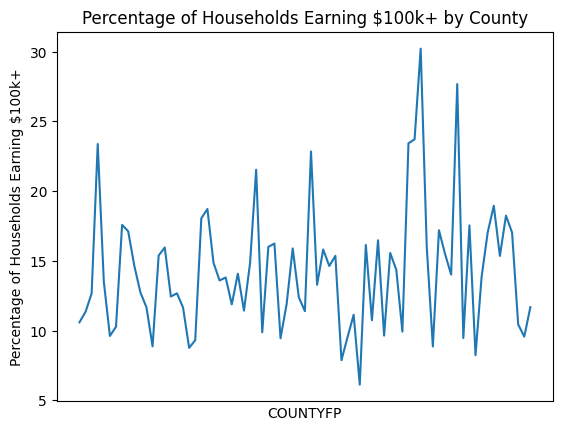

In [185]:
# Your Turn 5 - 
# Plot on a line graph
plt.plot(ar_inc_100["COUNTYFP"], ar_inc_100["pct_grtr_100"])

# Labels
plt.xlabel("COUNTYFP")
plt.ylabel("Percentage of Households Earning $100k+")
plt.title("Percentage of Households Earning $100k+ by County")

# Remove x-ticks - can delete if COUNTYFPS are vital, but looks so jumbled to me - rotating 90 degrees didnt fix
plt.xticks([], [])


<h3 class="yt">Your Turn: 6</h3>
Which counties have the <b><i>highest percentage of households making</i></b> <span class="num">\$100,00 or more</span>? <span class="num">Print</span> the <span class="num">10</span> counties with the largest percentage.  

In [187]:
# Your Turn 6 - 
# Sort descending to get the top ten households
top_ten = ar_inc_100.sort_values(by="pct_grtr_100", ascending=False)

top_ten.head(10)


,COUNTYFP,GEOID,NAME,geometry,B19001e1,B19001e14,B19001e15,B19001e16,B19001e17,inc_grtr_100,pct_grtr_100
56,007,05007,Benton,"POLYGON ((357702.168 4017409.455, 357685.772 4...",97249.0,8850.0,6100.0,6446.0,7981.0,29377.0,30.208023
62,125,05125,Saline,"POLYGON ((517571.181 3826170.575, 517572.197 3...",44075.0,4888.0,3378.0,2197.0,1733.0,12196.0,27.671015
55,053,05053,Grant,"POLYGON ((534488.988 3808030.278, 534498.944 3...",6863.0,628.0,458.0,450.0,91.0,1627.0,23.706834
54,119,05119,Pulaski,"POLYGON ((578621.064 3816988.532, 578615.553 3...",158051.0,12301.0,7472.0,8148.0,9107.0,37028.0,23.427881
3,085,05085,Lonoke,"POLYGON ((584519.936 3856034.703, 584527.711 3...",26895.0,2389.0,1498.0,1519.0,880.0,6286.0,23.372374
38,045,05045,Faulkner,"POLYGON ((542638.507 3898013.442, 542624.764 3...",44575.0,4362.0,2300.0,1985.0,1532.0,10179.0,22.835670
29,143,05143,Washington,"POLYGON ((361638.13 3985570.792, 361625.323 39...",87325.0,6740.0,3695.0,3895.0,4473.0,18803.0,21.532207
68,043,05043,Drew,"POLYGON ((594914.161 3729044.176, 594912.27 37...",7157.0,635.0,345.0,175.0,201.0,1356.0,18.946486
21,031,05031,Craighead,"POLYGON ((703258.525 3982624.144, 703583.367 3...",41375.0,3023.0,1732.0,1554.0,1434.0,7743.0,18.714199
70,139,05139,Union,"POLYGON ((501612.888 3678622.614, 501613.539 3...",15726.0,1108.0,692.0,560.0,508.0,2868.0,18.237314
